In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
class MorphologyImageProcessing:
    # 収縮
    def erode(self, img, iteration=1):
        H, W = img.shape
        input_img = np.pad(img, (1, 1), "edge")

        K = np.array(( (0, 1, 0), (1, 1, 1), (0, 1, 0) ), dtype=np.int)
        for t in range(iteration):
            output_img = np.ones((H+2, W+2)) * 255
            for i in range(1, H+1):
                for j in range(1, W+1):
                    if np.sum(K * input_img[i-1:i+2, j-1:j+2]) < 255*5:
                        output_img[i, j] = 0
            input_img = output_img.copy()
        output_img = input_img[1:1+H, 1:1+W]
        return output_img
    
    # 膨張
    def dilate(self, img, iteration=1):
        H, W = img.shape
        input_img = np.pad(img, (1, 1), "edge")

        K = np.array(( (0, 1, 0), (1, 1, 1), (0, 1, 0) ), dtype=np.int)
        for t in range(iteration):
            output_img = np.zeros((H+2, W+2))
            for i in range(1, H+1):
                for j in range(1, W+1):
                    if np.sum(K * input_img[i-1:i+2, j-1:j+2]) >= 255:
                        output_img[i, j] = 255
            input_img = output_img.copy()
        output_img = input_img[1:1+H, 1:1+W]
        return output_img
    
    def opening(self, img, iteration=1):
        img_out = self.erode(img, iteration)
        img_out = self.dilate(img_out, iteration)
        return img_out
    
    def closing(self, img, iteration=1):
        img_out = self.dilate(img, iteration)
        img_out = self.erode(img_out, iteration)
        return img_out

In [17]:
class ColorTracking:
    def rgb_to_hsv(self, r, g, b):
        ma, mi = max(r, g, b), min(r, g, b)
        h, s, v = 0, ma - mi, ma
        if mi == b:
            h = 60 * (g-r) / (ma-mi) + 60
        elif mi == r:
            h = 60 * (b-g) / (ma-mi) + 180
        elif mi == g:
            h = 60 * (r-b) / (ma-mi) + 300
        return [h, s, v]
    
    def rgb_to_hsv_image(self, img):
        H, W, _ = img.shape
        input_img = img.copy().astype(np.float32) / 255.0
        output_img = np.zeros_like(input_img).astype(np.float32)
        for y in range(H):
            for x in range(W):
                output_img[y, x, :] = self.rgb_to_hsv(*input_img[y, x, :])
        return output_img
    
    def hsv_to_rgb(self, h, s, v):
        c, h_p = s, h/60
        x = c * (1 - abs(h_p % 2 - 1))
        vec = [[c, x, 0], [x, c, 0], [0, c, x], [0, x, c], [x, 0, c], [c, 0, x]]

        r, g, b = v-c, v-c, v-c
        if 0 <= h_p < 6:
            h_p = int(h_p)
            r += vec[h_p][0]
            g += vec[h_p][1]
            b += vec[h_p][2]
        return [r, g, b]
    
    def hsv_to_rgb_image(self, img):
        H, W, _ = input_img.shape
        input_img = img.copy().astype(np.float32) / 255.0
        output_img = np.zeros_like(input_img).astype(np.float32)
        for y in range(H):
            for x in range(W):
                output_img[y, x, :] = self.hsv_to_rgb(*input_img[y, x, :])
        return output_img
    
    def tracking_for_problem_70(self, img):
        input_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        H, W, _ = input_img.shape
        img_hsv = self.rgb_to_hsv_image(input_img)
        output_img = np.zeros((H, W))
        for y in range(H):
            for x in range(W):
                if 180 < img_hsv[y, x, 0] < 260:
                    output_img[y, x] = 255
        return output_img
    
    def masking_for_problem_71(self, img):
        input_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        output_img = input_img.copy()
        mask = self.tracking_for_problem_70(img)
        output_img[mask==255, :] = [0, 0, 0]
        return output_img
    
    def masking_for_problem_72(self, img):
        input_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        output_img = input_img.copy()
        mip = MorphologyImageProcessing()
        mask = self.tracking_for_problem_70(img)
        mask = mip.opening(mip.closing(mask, 5), 5)
        output_img[mask==255, :] = [0, 0, 0]
        return output_img

In [18]:
class Solver:
    def __init__(self):
        self.converter = ColorTracking()
        
    def problem_70(self, input_img):
        output_img = self.converter.tracking_for_problem_70(input_img)
        plt.imshow(output_img, cmap="gray")
        plt.show()
        
    def problem_71(self, input_img):
        output_img = self.converter.masking_for_problem_71(input_img)
        plt.imshow(output_img)
        plt.show()
        
    def problem_72(self, input_img):
        output_img = self.converter.masking_for_problem_72(input_img)
        plt.imshow(output_img)
        plt.show()

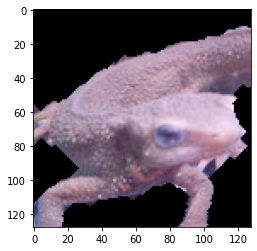

In [19]:
input_img = cv2.imread("../imori.jpg")
solver = Solver()
solver.problem_72(input_img)